# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [31]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_long_f = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_long_f.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

627

In [35]:
short_cities = cities[0:10]
print(short_cities)

['tuktoyaktuk', 'albany', 'beringovskiy', 'la asuncion', 'punta arenas', 'saint-philippe', 'mataura', 'mahebourg', 'butaritari', 'qaqortoq']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print heading
print("Beginning Data Retrieval")
print("-------------------------")

#Start index
index = 1
set = 1

#Initialize lists
temp_list = []
humidity_list = []
cloudy_list = []
wind_list = []
country_list = []
time_list = []

#Loop through city list
for city in cities:  
   
    #Get weather data and append the values to lists
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()       
    
    try:
        temperature = weather_json["main"]["temp_max"]
        temp_list.append(temperature)
        print(f"Processing Record {index} of Set {set} | {city}") 
    except KeyError:
        temp_list.append(np.NaN)
        print(f"No data available for {index} of Set {set} | {city}") 
            
    try:
        humidity = weather_json["main"]["humidity"]
        humidity_list.append(humidity)
        if humidity>100:
            print(f"{city} has a humidity greater than 100.")
    except KeyError:
        humidity_list.append(np.NaN)
    
    try:
        wind_speed = weather_json["wind"]["speed"]
        wind_list.append(wind_speed)
    except KeyError:
        wind_list.append(np.NaN)
    
    try:
        clouds = weather_json["clouds"]["all"]
        cloudy_list.append(clouds)
    except KeyError:
        cloudy_list.append(np.NaN)
        
    try:
        country = weather_json["sys"]["country"]
        country_list.append(country)
    except KeyError:
        country_list.append(np.NaN)
    
    try:
        date_time = weather_json["dt"]
        time_list.append(date_time)
    except KeyError:
        time_list.append(np.NaN)
    
    index += 1
    time.sleep(0.9)


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | la asuncion
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | alugan
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | sabha
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | khatanga
No data available for 22 of Set 1 | labutta
Processing Record 23 of Set 1 | tour

Processing Record 194 of Set 1 | arvika
Processing Record 195 of Set 1 | fare
Processing Record 196 of Set 1 | saskylakh
Processing Record 197 of Set 1 | solnechnyy
Processing Record 198 of Set 1 | the pas
Processing Record 199 of Set 1 | vaini
Processing Record 200 of Set 1 | kloulklubed
Processing Record 201 of Set 1 | cabo san lucas
Processing Record 202 of Set 1 | adelaide
Processing Record 203 of Set 1 | pangody
Processing Record 204 of Set 1 | viedma
Processing Record 205 of Set 1 | pacific grove
No data available for 206 of Set 1 | halalo
Processing Record 207 of Set 1 | nicolas bravo
Processing Record 208 of Set 1 | ayacucho
Processing Record 209 of Set 1 | sangueya
Processing Record 210 of Set 1 | ugoofaaru
Processing Record 211 of Set 1 | bomet
Processing Record 212 of Set 1 | tonantins
Processing Record 213 of Set 1 | rawson
Processing Record 214 of Set 1 | nizhniy kuranakh
No data available for 215 of Set 1 | bargal
Processing Record 216 of Set 1 | chincha alta
Processing R

Processing Record 388 of Set 1 | port lincoln
Processing Record 389 of Set 1 | duku
Processing Record 390 of Set 1 | bose
Processing Record 391 of Set 1 | mangai
Processing Record 392 of Set 1 | margherita
Processing Record 393 of Set 1 | mehamn
Processing Record 394 of Set 1 | gull lake
Processing Record 395 of Set 1 | radece
Processing Record 396 of Set 1 | olafsvik
Processing Record 397 of Set 1 | sakaiminato
Processing Record 398 of Set 1 | suntar
Processing Record 399 of Set 1 | husavik
Processing Record 400 of Set 1 | san ramon
Processing Record 401 of Set 1 | robertsport
Processing Record 402 of Set 1 | medeiros neto
Processing Record 403 of Set 1 | vila velha
No data available for 404 of Set 1 | toliary
Processing Record 405 of Set 1 | zhanaozen
Processing Record 406 of Set 1 | rio grande
No data available for 407 of Set 1 | kamenskoye
Processing Record 408 of Set 1 | koslan
Processing Record 409 of Set 1 | lockport
No data available for 410 of Set 1 | cumaribo
Processing Recor

Processing Record 582 of Set 1 | katsuura
Processing Record 583 of Set 1 | tahara
No data available for 584 of Set 1 | huazolotitlan
Processing Record 585 of Set 1 | polohy
Processing Record 586 of Set 1 | lashio
Processing Record 587 of Set 1 | college
Processing Record 588 of Set 1 | sistranda
Processing Record 589 of Set 1 | jiuquan
Processing Record 590 of Set 1 | ishigaki
Processing Record 591 of Set 1 | basar
Processing Record 592 of Set 1 | santa cruz de la palma
Processing Record 593 of Set 1 | hue
Processing Record 594 of Set 1 | soledade
Processing Record 595 of Set 1 | stirling
Processing Record 596 of Set 1 | batemans bay
Processing Record 597 of Set 1 | williams lake
Processing Record 598 of Set 1 | saurimo
No data available for 599 of Set 1 | gurskoye
Processing Record 600 of Set 1 | havre-saint-pierre
Processing Record 601 of Set 1 | te anau
No data available for 602 of Set 1 | umzimvubu
Processing Record 603 of Set 1 | agadir
Processing Record 604 of Set 1 | whyalla
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
lats = [i[0] for i in lat_long_f]
longs = [i[1] for i in lat_long_f]

weather_df = pd.DataFrame(
    {"City": cities,
     "Latitude": lats,
     "Longitude": longs,
     "Temperature (°F)":temp_list,
     "Humidity": humidity_list,
     "Cloudiness": cloudy_list,
     "Wind Speed (mph)": wind_list,
     "Country": country_list,
     "Date Time": time_list})

weather_df.to_csv(output_data_file)

In [41]:
weather_df.head()

,City,Latitude,Longitude,Temperature (°F),Humidity,Cloudiness,Wind Speed (mph),Country,Date Time
0,tuktoyaktuk,70.359980,-129.812208,12.20,79.0,40.0,26.46,CA,1.619050e+09
1,albany,-73.542428,101.000029,37.00,55.0,79.0,13.18,US,1.619050e+09
2,beringovskiy,54.447493,175.503084,27.90,74.0,67.0,4.32,RU,1.619051e+09
3,la asuncion,12.671419,-64.225423,76.95,83.0,1.0,14.94,VE,1.619051e+09
4,punta arenas,-76.702237,-111.875297,41.00,60.0,0.0,6.91,CL,1.619050e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
#Re-importing the csv so I don't have to re-run anything above
#weather_df = pd.read_csv("output_data/cities.csv")

#Cleaning dataframe of cities with missing data
cleaned_weather_df = weather_df.dropna(axis = 0, how = "any")
cleaned_weather_df.head()



,Unnamed: 0,City,Latitude,Longitude,Temperature (°F),Humidity,Cloudiness,Wind Speed (mph),Country,Date Time
0,0,tuktoyaktuk,70.359980,-129.812208,12.20,79.0,40.0,26.46,CA,1.619050e+09
1,1,albany,-73.542428,101.000029,37.00,55.0,79.0,13.18,US,1.619050e+09
2,2,beringovskiy,54.447493,175.503084,27.90,74.0,67.0,4.32,RU,1.619051e+09
3,3,la asuncion,12.671419,-64.225423,76.95,83.0,1.0,14.94,VE,1.619051e+09
4,4,punta arenas,-76.702237,-111.875297,41.00,60.0,0.0,6.91,CL,1.619050e+09


In [18]:
#Save cleaned weather file to csv
cleaned_weather_df.to_csv("output_data/cleaned_cities.csv")

In [5]:
#Checking for the number of valid weather data cities
print(len(cleaned_weather_df))

572


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

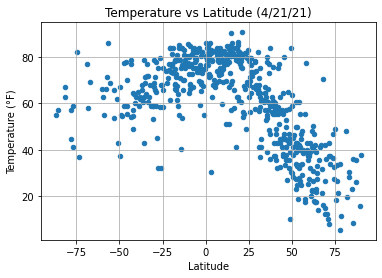

In [6]:
#Filter the Data frame for the latitude and temperature columns
lat_and_temp = cleaned_weather_df[["Latitude", "Temperature (°F)"]]

#Use df.plot to create a scatter plot
lat_and_temp.plot(kind = "scatter", x="Latitude", y="Temperature (°F)", grid=True, title="Temperature vs Latitude (4/21/21)")

plt.savefig("output_data/fig1.png")

plt.show()

The above figure is depicting the relationship between latitude and temperature. The cities nearer the equator at 0° latitude have the highest temperatures. Cities in the northern hemisphere and positioned over 50°N have much lower maximum temperatures.

## Latitude vs. Humidity Plot

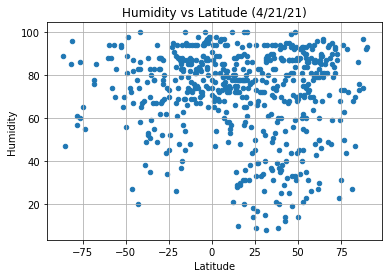

In [7]:
#Filter the Data frame for the latitude and humidity columns
lat_and_hum = cleaned_weather_df[["Latitude", "Humidity"]]

#Use df.plot to create a scatter plot
lat_and_hum.plot(kind = "scatter", x="Latitude", y="Humidity", grid=True, title="Humidity vs Latitude (4/21/21)")

plt.savefig("output_data/fig2.png")

plt.show()

The above figure does not seem to indicate much of a correlation between humidity and latitude. Humid and dry air are found at almost all latitudes.

## Latitude vs. Cloudiness Plot

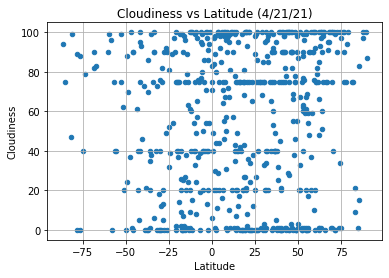

In [8]:
#Filter the Data frame for the latitude and cloudiness columns
lat_and_cloud = cleaned_weather_df[["Latitude", "Cloudiness"]]

#Use df.plot to create a scatter plot
lat_and_cloud.plot(kind = "scatter", x="Latitude", y="Cloudiness", grid=True, title="Cloudiness vs Latitude (4/21/21)")

plt.savefig("output_data/fig3.png")

plt.show()

The above figure depicts cloud coverage as a function of latitude. This does not seem to indicate much of a correlation between cloud cover and latitude. Cloudiness levels from 0 to 100 are found at almost all latitudes.

## Latitude vs. Wind Speed Plot

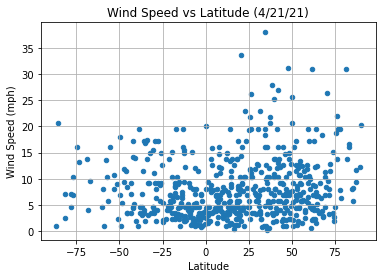

In [9]:
#Filter the Data frame for the latitude and cloudiness columns
lat_and_wind = cleaned_weather_df[["Latitude", "Wind Speed (mph)"]]

#Use df.plot to create a scatter plot
lat_and_wind.plot(kind = "scatter", x="Latitude", y="Wind Speed (mph)", grid=True, title="Wind Speed vs Latitude (4/21/21)")

plt.savefig("output_data/fig4.png")

plt.show()

This graph depicts wind speed in relation to latitude. Higher wind speeds are more prevalent in the northern hemisphere. This is probably due to the larger quantity of land mass in the northern hemisphere as compared to the southern hemisphere.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R = -0.8276899351821334


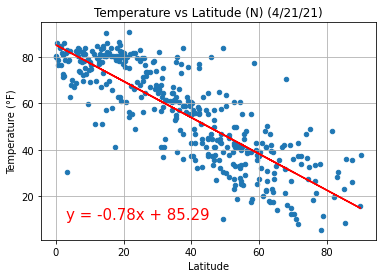

In [10]:
lat_and_temp_north = lat_and_temp[lat_and_temp["Latitude"]>=0]
x_values = lat_and_temp_north["Latitude"]
y_values = lat_and_temp_north["Temperature (°F)"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_temp_north.plot(kind = "scatter", x="Latitude", y="Temperature (°F)", grid=True, title="Temperature vs Latitude (N) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,10),fontsize=15,color="red")
plt.savefig("output_data/fig5.png")

plt.show()

The line of best fit shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere (R = -0.83). As the locations are further north, the maximum temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R = 0.4791194458972702


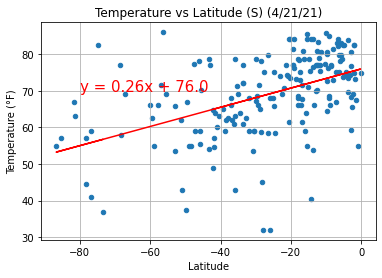

In [11]:
lat_and_temp_south = lat_and_temp[lat_and_temp["Latitude"]<=0]
x_values = lat_and_temp_south["Latitude"]
y_values = lat_and_temp_south["Temperature (°F)"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_temp_south.plot(kind = "scatter", x="Latitude", y="Temperature (°F)", grid=True, title="Temperature vs Latitude (S) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,70),fontsize=15,color="red")
plt.savefig("output_data/fig6.png")

plt.show()

There is a moderate positive correlation (R = 0.48) in the southern hemisphere. As the locations are further south, max  temperatures are generally lower. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.02626937384187067


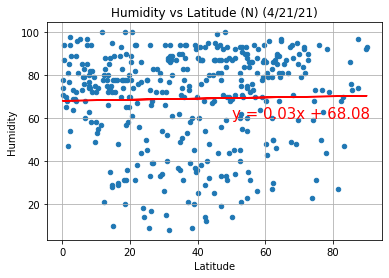

In [12]:
lat_and_hum_north = lat_and_hum[lat_and_hum["Latitude"]>=0]
x_values = lat_and_hum_north["Latitude"]
y_values = lat_and_hum_north["Humidity"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_hum_north.plot(kind = "scatter", x="Latitude", y="Humidity", grid=True, title="Humidity vs Latitude (N) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.savefig("output_data/fig7.png")

plt.show()

This regression shows that no correlation (R = 0.03) exists between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.19171074615560985


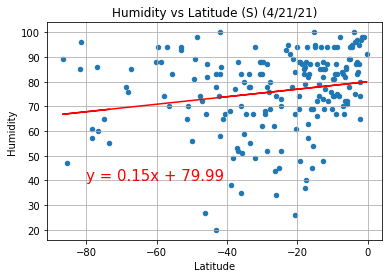

In [13]:
lat_and_hum_south = lat_and_hum[lat_and_hum["Latitude"]<=0]
x_values = lat_and_hum_south["Latitude"]
y_values = lat_and_hum_south["Humidity"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_hum_south.plot(kind = "scatter", x="Latitude", y="Humidity", grid=True, title="Humidity vs Latitude (S) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")
plt.savefig("output_data/fig8.png")

plt.show()

The above scatter plot and regression also indicate little to no correlation between humidity and latitude (R = 0.18).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = 0.09212142347886253


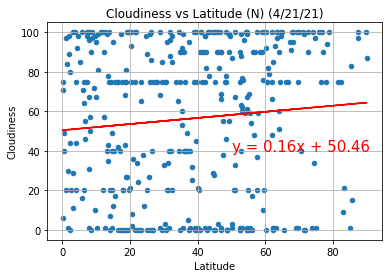

In [14]:
lat_and_cloud_north = lat_and_cloud[lat_and_cloud["Latitude"]>=0]
x_values = lat_and_cloud_north["Latitude"]
y_values = lat_and_cloud_north["Cloudiness"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_cloud_north.plot(kind = "scatter", x="Latitude", y="Cloudiness", grid=True, title="Cloudiness vs Latitude (N) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.savefig("output_data/fig9.png")

plt.show()

The scatter plot and regression above shows little to no correlation between cloudiness and latitude in the northern hemisphere (R = 0.09).

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = -0.04279188308451525


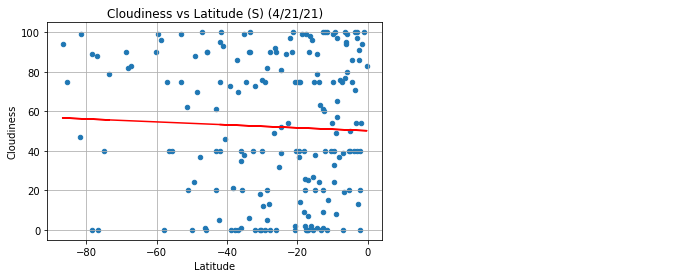

In [15]:
lat_and_cloud_south = lat_and_cloud[lat_and_cloud["Latitude"]<=0]
x_values = lat_and_cloud_south["Latitude"]
y_values = lat_and_cloud_south["Cloudiness"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_cloud_south.plot(kind = "scatter", x="Latitude", y="Cloudiness", grid=True, title="Cloudiness vs Latitude (S) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.savefig("output_data/fig10.png")

plt.show()

The above graph of cloudiness vs latitude shows little to no correlation (R = -0.04) between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = 0.17024879252607208


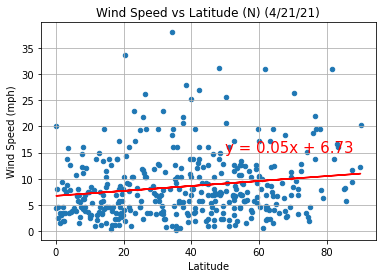

In [16]:
lat_and_wind_north = lat_and_wind[lat_and_wind["Latitude"]>=0]
x_values = lat_and_wind_north["Latitude"]
y_values = lat_and_wind_north["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_wind_north.plot(kind = "scatter", x="Latitude", y="Wind Speed (mph)", grid=True, title="Wind Speed vs Latitude (N) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.savefig("output_data/fig11.png")

plt.show()

The above scatter plot show a low correlation (R = 0.17) between wind speed and latitude in the northern hemisphere. Wind speed only increases very slightly as you move north.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = -0.2732553454272426


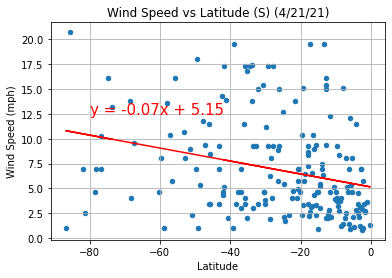

In [17]:
lat_and_wind_south = lat_and_wind[lat_and_wind["Latitude"]<=0]
x_values = lat_and_wind_south["Latitude"]
y_values = lat_and_wind_south["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
print(f"R = {rvalue}")

#Use df.plot to create a scatter plot
lat_and_wind_south.plot(kind = "scatter", x="Latitude", y="Wind Speed (mph)", grid=True, title="Wind Speed vs Latitude (S) (4/21/21)")

#Add the line of best fit
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,12.5),fontsize=15,color="red")
plt.savefig("output_data/fig12.png")

plt.show()

In the southern hemisphere, there is a low to moderate negative correlation between wind speed and humidity (R = -0.27). As you move south, wind speed increases slightly.